In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/bhagi/Unified_Mentor/Heart_Disease_Analysis/Heart Disease data/Heart Disease data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Normalization/Standardization

In [3]:
#normalization numerical features for better analysis and visualization
from sklearn.preprocessing import MinMaxScaler
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.292453,0.196347,0,1,0.740458,0,0.161290,2,2,3,0
1,0.500000,1,0,0.433962,0.175799,1,0,0.641221,1,0.500000,0,0,3,0
2,0.854167,1,0,0.481132,0.109589,0,1,0.412214,1,0.419355,0,0,3,0
3,0.666667,1,0,0.509434,0.175799,0,1,0.687023,0,0.000000,2,1,3,0
4,0.687500,0,0,0.415094,0.383562,1,1,0.267176,0,0.306452,1,3,2,0


# EDA

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.529878,0.695610,0.942439,0.354827,0.273973,0.149268,0.529756,0.596291,0.336585,0.172825,1.385366,0.754146,2.323902,0.513171
std,0.189006,0.460373,1.029641,0.165252,0.117791,0.356527,0.527878,0.175616,0.472772,0.189525,0.617755,1.030798,0.620660,0.500070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.465649,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.562500,1.000000,1.000000,0.339623,0.260274,0.000000,1.000000,0.618321,0.000000,0.129032,1.000000,0.000000,2.000000,1.000000
75%,0.666667,1.000000,2.000000,0.433962,0.340183,0.000000,1.000000,0.725191,1.000000,0.290323,2.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000


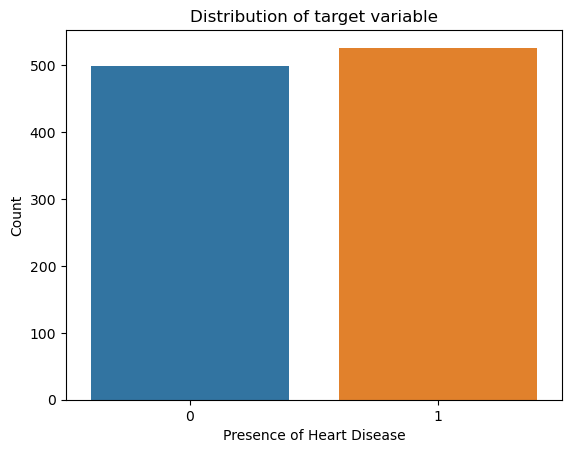

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#ditribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of target variable')
plt.xlabel('Presence of Heart Disease')
plt.ylabel('Count')
plt.show()

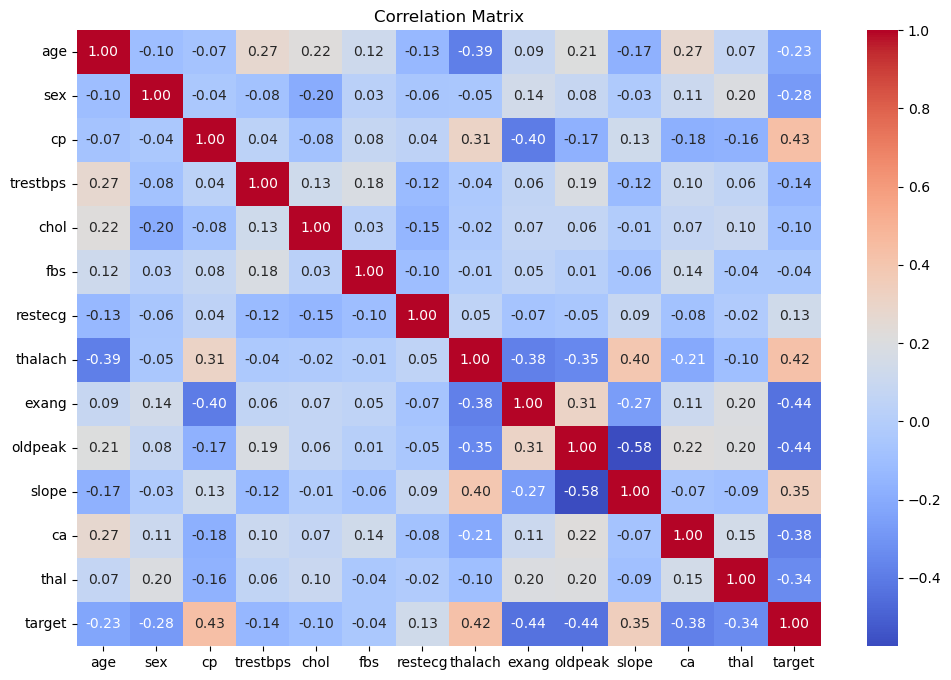

In [6]:
#Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

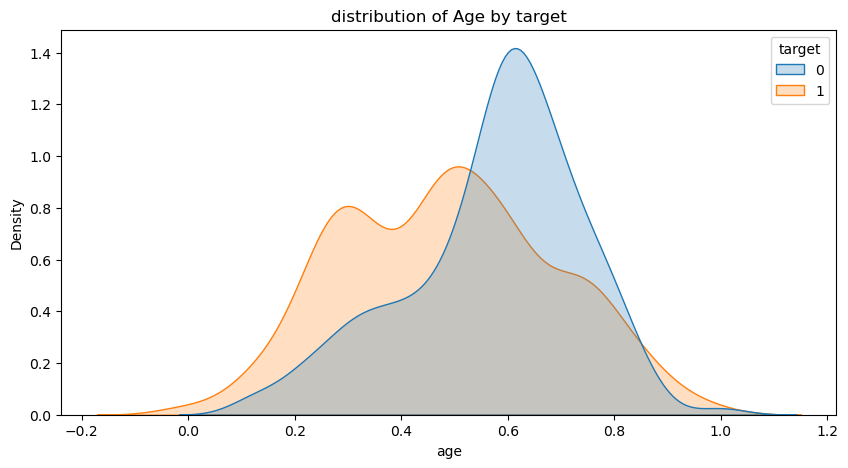

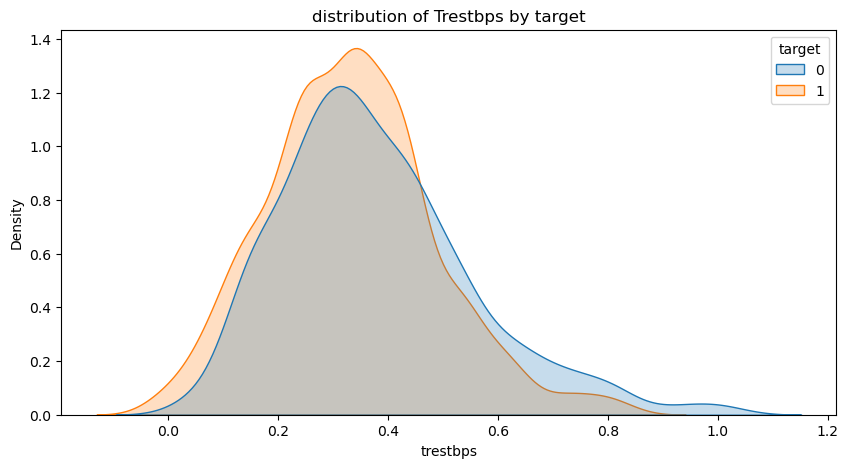

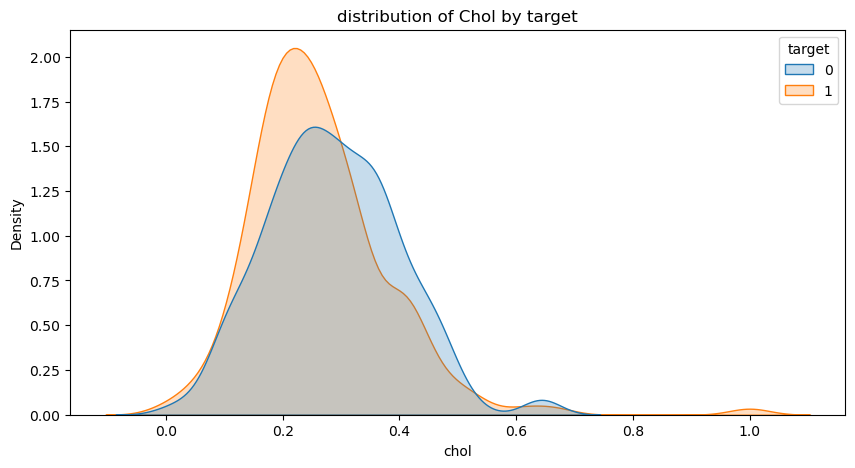

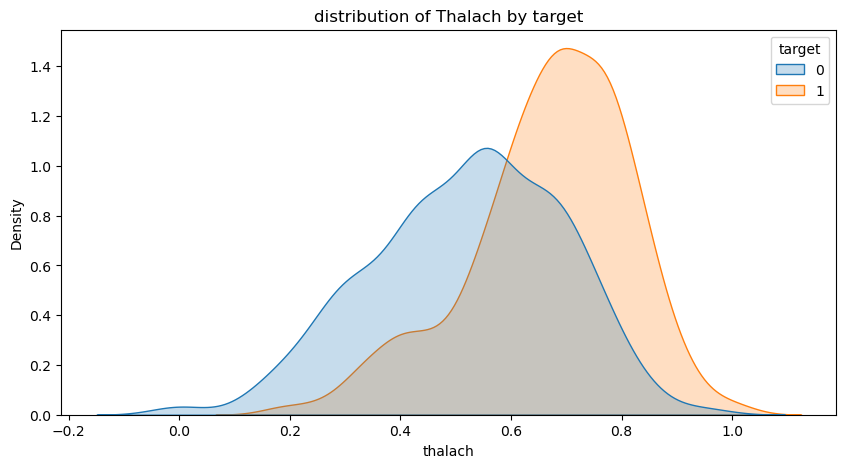

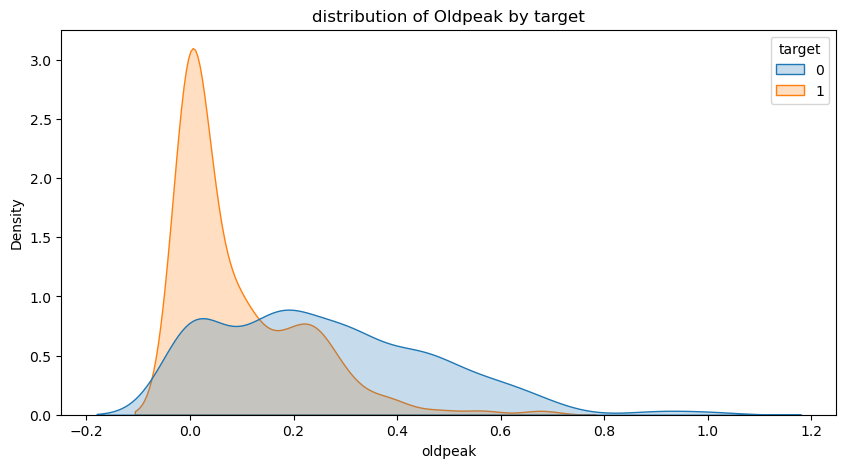

In [7]:
#distributions of numerical features by target variable
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for feature in numerical_features:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df, x=feature, hue='target', fill=True)
    plt.title(f'distribution of {feature.capitalize()} by target')
    plt.show()

In [8]:
#key metrics by gender
gender_metrics = df.groupby('sex').mean()
print("Key Metrics by Gender:")
gender_metrics

Key Metrics by Gender:


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,0.559362,1.006410,0.374546,0.309258,0.134615,0.573718,0.609390,0.237179,0.148573,1.410256,0.580128,2.137821,0.724359
1,0.516976,0.914446,0.346199,0.258532,0.155680,0.510519,0.590559,0.380084,0.183437,1.374474,0.830295,2.405330,0.420757


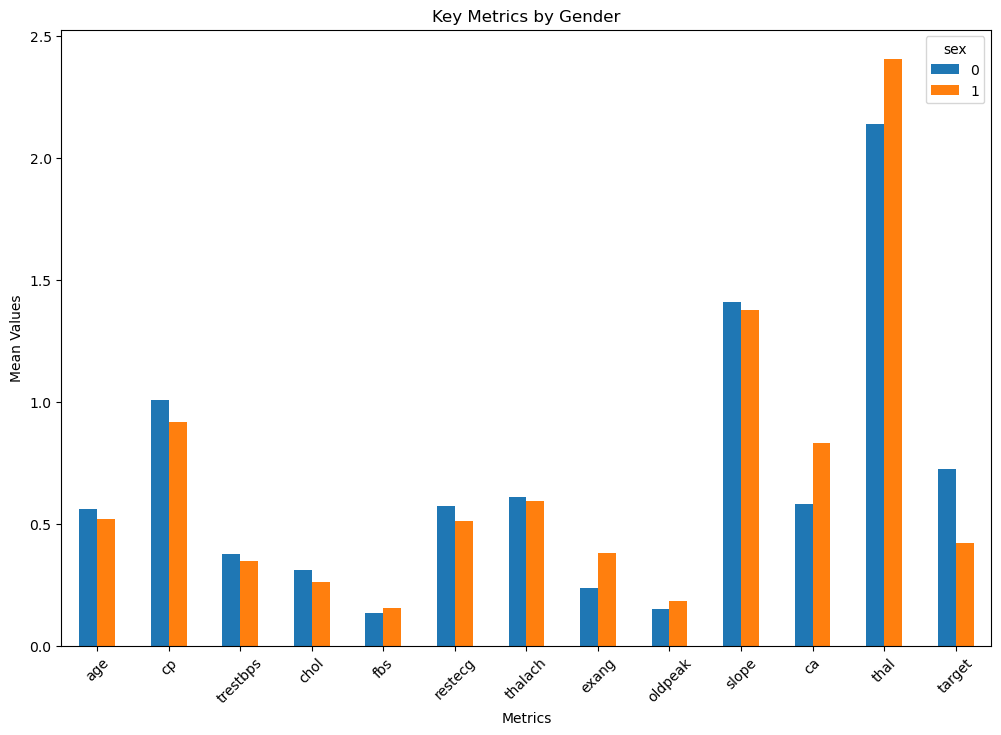

In [9]:
# Visualizing key metrics by gender
gender_metrics.T.plot(kind='bar', figsize=(12,8))
plt.title('Key Metrics by Gender')
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.show()

In [10]:
#key metrics by age group
df['age_group'] = pd.cut(df['age'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['<20%', '20-40%', '40-60%', '60-80%', '>80%'])
age_group_metrics = df.groupby('age_group').mean()
print("Key Metrics by Age Group:")
age_group_metrics

Key Metrics by Age Group:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age_group,,,,,,,,,,,,,,
<20%,0.147436,0.743590,1.435897,0.308176,0.182590,0.000000,0.846154,0.768056,0.282051,0.164599,1.641026,0.820513,2.282051,0.717949
20-40%,0.306179,0.743590,0.987179,0.281124,0.251473,0.085470,0.585470,0.671690,0.252137,0.099807,1.491453,0.290598,2.230769,0.675214
40-60%,0.513205,0.720000,0.892308,0.355994,0.275890,0.178462,0.560000,0.586025,0.403077,0.164417,1.375385,0.664615,2.332308,0.541538
60-80%,0.683028,0.652174,0.853261,0.397098,0.297846,0.168478,0.440217,0.552294,0.347826,0.222651,1.301630,1.067935,2.380435,0.347826
>80%,0.865152,0.581818,1.290909,0.412864,0.270403,0.236364,0.527273,0.479389,0.290909,0.218182,1.327273,1.163636,2.345455,0.581818


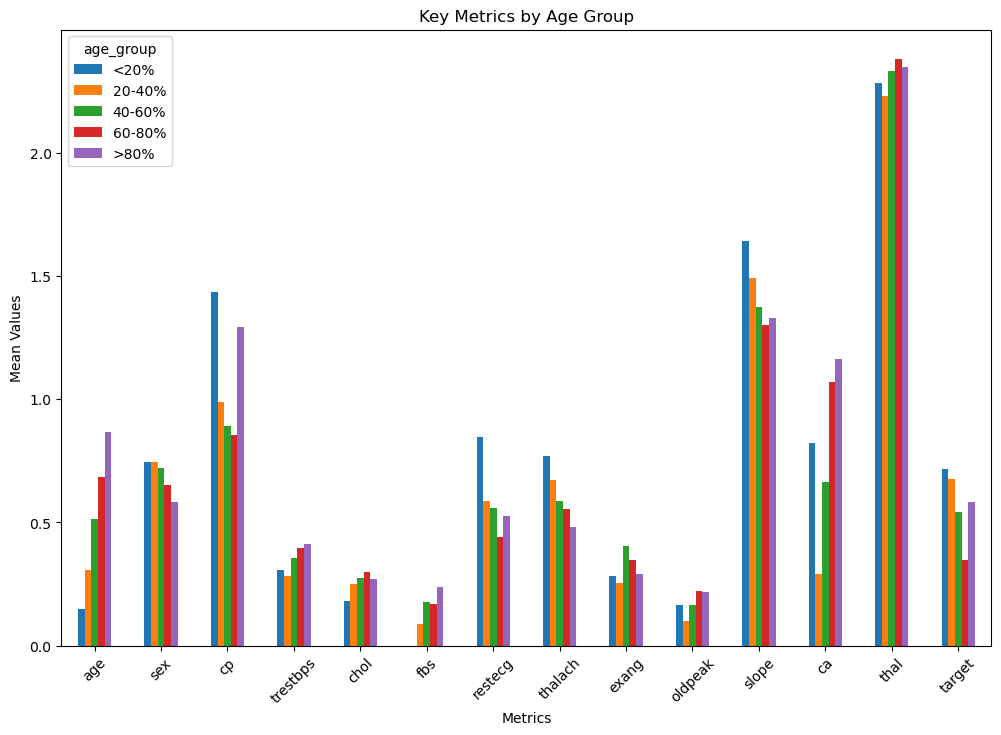

In [11]:
# Visualizing key metrics by age group
age_group_metrics.T.plot(kind='bar', figsize=(12, 8))
plt.title('Key Metrics by Age Group')
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.show()